### Проект: Рынок заведений общественного питания Москвы

Цель - выяснить текущее положение дел на рынке заведений общественного питания Москвы

#### Описание данных
Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

#### Ход проекта
1. [Получение данных и ознакомление](#start)
2. [Предподготовка](#podgotovka)
   * [Проверка дубликатов](#podgotovka3)
   * [Выделение столбца с улицами](#street)
   * [Классификация предприятий по количеству посадочных мест](#number)
3. [Анализ](#analyz)
* [Соотношение видов объектов общественного питания по количеству, график](#analyz1)
* [Соотношение сетевых и несетевых заведений по количеству, график](#analyz2)
* [Вид объекта общественного питания характерный для сетевого распространения](#analyz3)
* [Среднее количество посадочных мест](#analyz5)
* [Топ-10 улиц по количеству объектов общественного питания](#analyz6)
* [Улицы с одним объектом общественного питания](#analyz7)
* [Вывод](#analyz8)
4. [Презентация ](#preza)

#### 1. Получение данных и ознакомление <a id = "start"></a>

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from numpy import median
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
import re
from plotly import graph_objects as go
import requests
import json

In [2]:
try:
    data = pd.read_csv('rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [6]:
data['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
229       1
356       1
481       1
167       1
119       1
Name: number, Length: 315, dtype: int64

Мы видим, что у нас есть 15366 адресов заведений, в них нет пропусков, но есть аномальные заведения с нулём посадочных мест и их аж 1621. Самое большое количество заведений- кафе (6 тыс заведений), меньше всех-магазинов(отделов кулинарии)-всего 273.

Нужно будет разобраться с нулями.

С типами данных всё ок.

Пропущенных значений нет.

#### 2. Предподготовка <a id = "podgotovka"></a>

##### * Проверка дубликатов <a id = "podgotovka3"></a>

In [7]:
data.duplicated().sum()

0

Проверим на совпадения все колонки кроме id и посмотрим  - что там и сколько их.

In [8]:
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
data[data.duplicated(subset=['object_name','address','chain','object_type'])].head(20)

,id,object_name,chain,object_type,address,number
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",150
2379,28609,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, строение 1",30
2380,28610,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",200
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2382,28615,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",168
2383,28616,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, 2-я Бауманская улица, дом 5, строение 1",64


In [9]:
len(data[data.duplicated(subset=['object_name','address','chain','object_type'])])

170

In [10]:
len(data[data.duplicated(subset=['object_name','address','chain','object_type'])])/len(data)*100

1.1063386697904465

Явных дубликатов нет.
Есть 170 неявных дубликатов, некоторые из них возможно действительно дубликаты, например - Буфет Мади, другие же нет, например на территории комбината питания действительно находится несколько столовых. Так как дубликатов-всего 1%, они не повлияют на наш анализ и мы можем их не удалять.
Разберемся с адресами - выделим отдельный столбец с улицами.

##### *Выделение отдельного столбца с улицами<a id = "street"></a>

In [11]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд','аллея','бульвар','набережная','тупик','линия','поселение']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=re.I)
data['street'].value_counts()

проспект Мира                   204
Профсоюзная улица               182
Ленинградский проспект          171
Пресненская набережная          167
Варшавское шоссе                164
                               ... 
Вяземская улица                   1
улица Екатерины Будановой         1
Троилинский переулок              1
1-й Николощеповский переулок      1
улица Евгения Родионова           1
Name: street, Length: 1912, dtype: int64

In [12]:
zero = data.query('number==0')
zero['object_type'].value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

In [13]:
len(zero)

1621

In [14]:
zero['object_name'].value_counts()

Шаурма                 190
Милти                   51
Пекарня                 42
Кофе с собой            33
Выпечка                 24
                      ... 
ЭЛЬ КАФЕ                 1
Шаурма-выпечка           1
Выпечка,шаурма           1
Япошкин Кот              1
Готовые блюда Милти      1
Name: object_name, Length: 887, dtype: int64

Мы видим, что это не ошибка в данных, а помещения без сидячих мест - еда на вынос, эти заведения не будут влияеть на нашу целеую аудиторию - людей, кто хочет покушать в кафе с официантами, потому можем отфильтровать их из наших данных.

In [15]:
data = data.query('number!=0')

In [16]:
data.describe()

,id,number
count,13745.000000,13745.000000
mean,112273.028519,66.569807
std,72853.337528,76.005550
min,838.000000,1.000000
25%,27715.000000,20.000000
50%,134271.000000,44.000000
75%,178425.000000,85.000000
max,223438.000000,1700.000000


Мы узнали классификацию предприятий общественного питания по количеству мест:

до 50

от 50 до 500

от 500 и выше

#### *Классификация кафе по количеству посадочных мест<a id = "number"></a>

In [17]:
little_cafe = data.query('number<50')
len(little_cafe)

7772

In [18]:
std_cafe = data.query('number>=50 & number<500')
len(std_cafe)

5939

In [19]:
big_cafe = data.query('number>=500')
len(big_cafe)

34

Заведения до 50 мест - самые многочисленные, их аж 7772, на втором месте средние - 5939, крупных ресторанов совсем мало, что и ожидаемо с таким количество посадочных мест - их всего 34.

Посмотроим для каждой из них "ящик с усами".

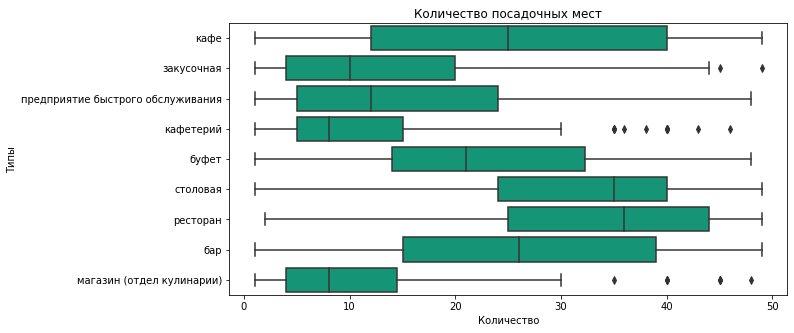

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'object_type', 
            x = 'number', data=little_cafe, color="#00aa80", width=0.8, orient='h').set(title='Количество посадочных мест',xlabel='Количество', ylabel='Типы')
None

##### Для маленьких заведений почти нет аномальных значений.

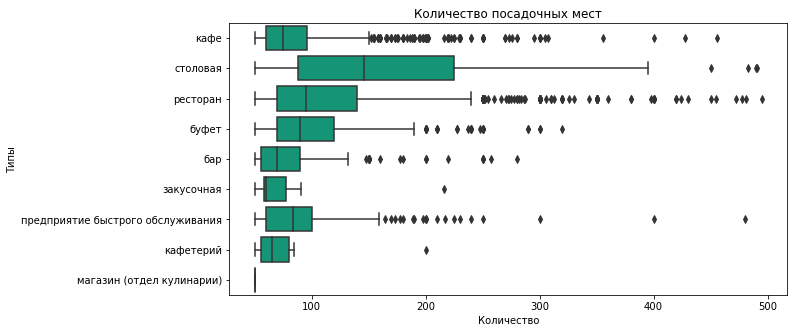

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'object_type', 
x = 'number', data=std_cafe, color="#00aa80", width=0.8, orient='h').set(title='Количество посадочных мест',
xlabel='Количество', ylabel='Типы')
None

Здесь аномальных значений уже больше, видим, что в основном среди стандартных заведений встречаются те, кто попадает в размеры - до 250 посадочных мест.

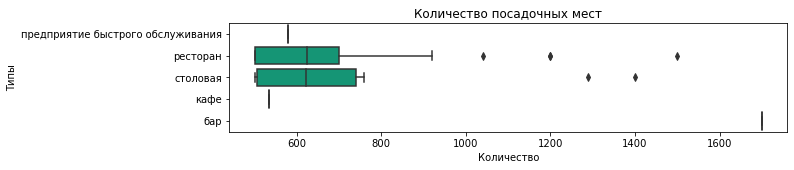

In [22]:
plt.figure(figsize=(10,2))
sns.boxplot(y = 'object_type', 
            x = 'number', data=big_cafe, color="#00aa80", width=0.8, orient='h').set(title='Количество посадочных мест',
                                                                                   xlabel='Количество', ylabel='Типы')
None

Логично, что в крупных заведениях остались только рестораны и столовые, с некоторыми редкими ресторанами свыше 1000 мест.
Разобрались с заведениями с едой на вынос, маленькими, крупными и средними, а так же с улицами, теперь можем приступать к анализу.


#### 3.Анализ <a id = "analyz"></a>

##### * Соотношение видов объектов общественного питания по количеству, график <a id = "analyz1"></a>

In [23]:
object_type = data.groupby('object_type').count().reset_index().sort_values(by = 'id')
object_type['fraction,%'] = (object_type['id']/object_type['id'].sum()*100).round(2)
object_type

,object_type,id,object_name,chain,address,number,street,"fraction,%"
5,магазин (отдел кулинарии),128,128,128,128,128,127,0.93
2,закусочная,171,171,171,171,171,169,1.24
4,кафетерий,285,285,285,285,285,272,2.07
1,буфет,517,517,517,517,517,498,3.76
0,бар,828,828,828,828,828,814,6.02
6,предприятие быстрого обслуживания,1219,1219,1219,1219,1219,1202,8.87
7,ресторан,2240,2240,2240,2240,2240,2205,16.30
8,столовая,2568,2568,2568,2568,2568,2474,18.68
3,кафе,5789,5789,5789,5789,5789,5680,42.12


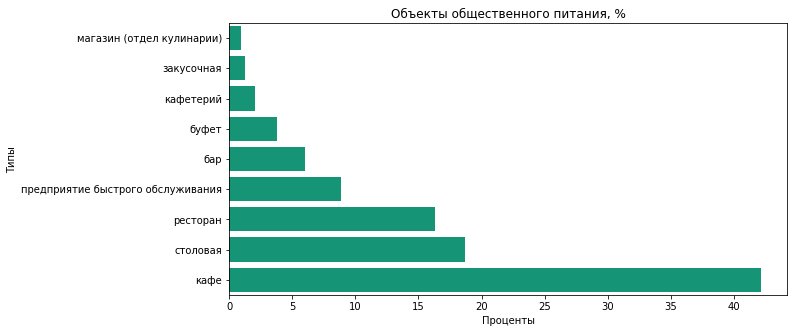

In [24]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'fraction,%',y='object_type',data= object_type, 
            estimator=median, color = "#00aa80").set(xlabel='Проценты', ylabel='Типы', 
                                                    title = 'Объекты общественного питания, %')
plt.show()

На третьем месте ресторан - 16% 
на втором- столовая - 19% 
и абсолютный лидер - кафе -42%

Посмотрим в разбивке по крупным, средним и маленьким:

In [25]:
little_type = little_cafe.groupby('object_type').count().reset_index().sort_values(by = 'id')
little_type['fraction,%'] = (little_type['id']/little_type['id'].sum()*100).round(2)
little_type

,object_type,id,object_name,chain,address,number,street,"fraction,%"
5,магазин (отдел кулинарии),127,127,127,127,127,126,1.63
2,закусочная,164,164,164,164,164,162,2.11
4,кафетерий,279,279,279,279,279,266,3.59
1,буфет,308,308,308,308,308,293,3.96
8,столовая,549,549,549,549,549,535,7.06
0,бар,585,585,585,585,585,574,7.53
7,ресторан,603,603,603,603,603,594,7.76
6,предприятие быстрого обслуживания,965,965,965,965,965,951,12.42
3,кафе,4192,4192,4192,4192,4192,4120,53.94


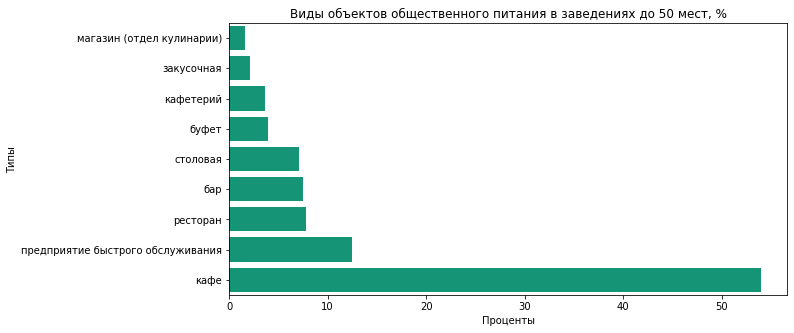

In [26]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'fraction,%',y='object_type',data=little_type, 
             color = '#00aa80').set(xlabel='Проценты', ylabel='Типы', 
                title = 'Виды объектов общественного питания в заведениях до 50 мест, %')
plt.show()

Ресторан и кафе остаются в тройке, но вместо столовой сюда попадают предприятия быстрого обслужтвания.

In [27]:
std_type = std_cafe.groupby('object_type').count().reset_index().sort_values(by = 'id')
std_type['fraction,%'] = (std_type['id']/std_type['id'].sum()*100).round(2)
std_type

,object_type,id,object_name,chain,address,number,street,"fraction,%"
5,магазин (отдел кулинарии),1,1,1,1,1,1,0.02
4,кафетерий,6,6,6,6,6,6,0.10
2,закусочная,7,7,7,7,7,7,0.12
1,буфет,209,209,209,209,209,205,3.52
0,бар,242,242,242,242,242,239,4.07
6,предприятие быстрого обслуживания,253,253,253,253,253,250,4.26
3,кафе,1596,1596,1596,1596,1596,1559,26.87
7,ресторан,1616,1616,1616,1616,1616,1590,27.21
8,столовая,2009,2009,2009,2009,2009,1929,33.83


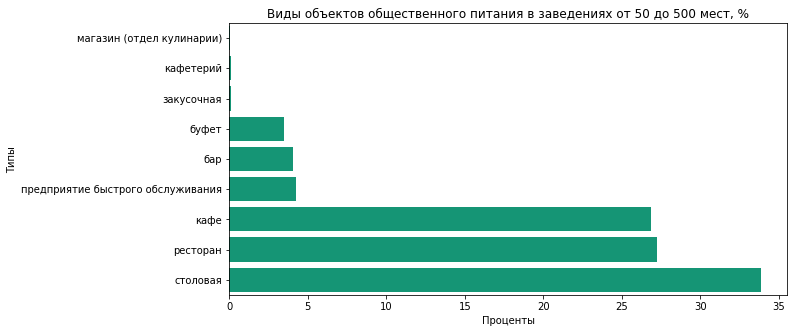

In [28]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'fraction,%',y='object_type',data=std_type, 
            color = "#00aa80").set(xlabel='Проценты', ylabel='Типы', 
                title = 'Виды объектов общественного питания в заведениях от 50 до 500 мест, %')
plt.show()

Здесь уже полностью пропали магазины, закусочные и кафетерии, в топе как и в общем топе- кафе, ресторан и столовая.

In [29]:
big_type = big_cafe.groupby('object_type').count().reset_index().sort_values(by = 'id')
big_type['fraction,%'] = (big_type['id']/big_type['id'].sum()*100).round(2)
big_type

,object_type,id,object_name,chain,address,number,street,"fraction,%"
0,бар,1,1,1,1,1,1,2.94
1,кафе,1,1,1,1,1,1,2.94
2,предприятие быстрого обслуживания,1,1,1,1,1,1,2.94
4,столовая,10,10,10,10,10,10,29.41
3,ресторан,21,21,21,21,21,21,61.76


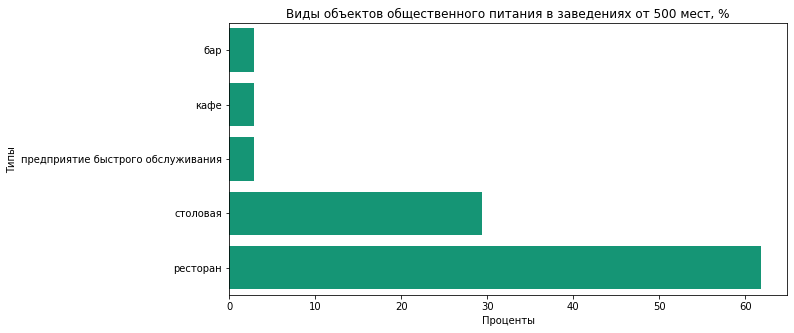

In [30]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'fraction,%',y='object_type',data=big_type, 
            color = "#00aa80").set(xlabel='Проценты', ylabel='Типы', 
                title = 'Виды объектов общественного питания в заведениях от 500 мест, %')
plt.show()

В топе все так же ресторан и столовая, топ не отличается от общего.

##### * Соотношение сетевых и несетевых заведений по количеству, график <a id = "analyz2"></a>

In [31]:
group_data = data.groupby('chain').count().reset_index().sort_values(by = 'id')
group_data['chain_fraction'] = group_data['id']/group_data['id'].sum()*100
group_data

,chain,id,object_name,object_type,address,number,street,chain_fraction
0,да,2700,2700,2700,2700,2700,2658,19.643507
1,нет,11045,11045,11045,11045,11045,10783,80.356493


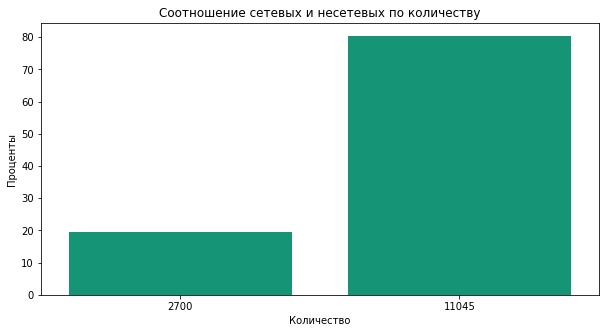

In [32]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'id',y='chain_fraction',data=group_data, color = "#00aa80").set(title = 'Сoотношение сетевых и несетевых по количеству',
                                        xlabel='Количество', ylabel='Проценты')

plt.show()

Логично, что сетевых в несколько раз меньше, чем несетевых. Изучим их более подробно.

##### * Вид объектов общественного питания характерные для сетевого распространения <a id = "analyz3"></a>

In [33]:
chain = data.query('chain=="да"').groupby('object_type').count().reset_index().sort_values(by = 'id')
chain['fraction,%'] = (chain['id']/chain['id'].sum()*100).round(2)
chain

,object_type,id,object_name,chain,address,number,street,"fraction,%"
1,буфет,3,3,3,3,3,3,0.11
8,столовая,3,3,3,3,3,3,0.11
0,бар,36,36,36,36,36,35,1.33
4,кафетерий,37,37,37,37,37,37,1.37
2,закусочная,38,38,38,38,38,38,1.41
5,магазин (отдел кулинарии),45,45,45,45,45,45,1.67
7,ресторан,526,526,526,526,526,517,19.48
6,предприятие быстрого обслуживания,671,671,671,671,671,660,24.85
3,кафе,1341,1341,1341,1341,1341,1320,49.67


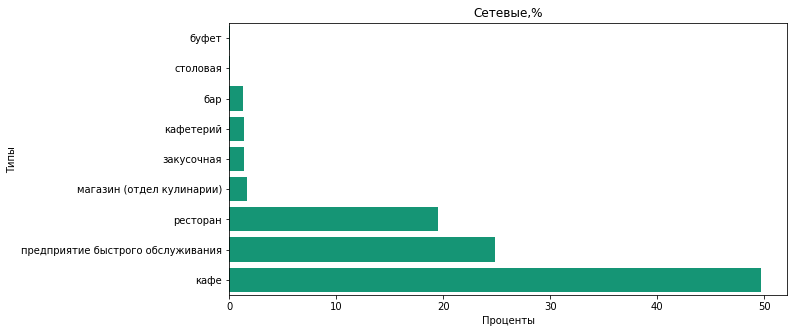

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'fraction,%',y='object_type', data=chain, color = "#00aa80").set(xlabel='Проценты', ylabel='Типы', 
title = 'Сетевые,%')
plt.show()

В сетевом направлении топ такой же, как в общем количестве заведений. С огромным отрывом лидирует кафе - 50% на втором месте - предприятия быстрого обслуживания - 25%, на третьем - рестораны - 20%.

In [35]:
print('Всего сетевых в заведениях с посадкой до 50 мест:',len(little_cafe.query('chain=="да"')))
l = len(little_cafe.query('chain=="да"'))/len(little_cafe)
print(f'Доля сетевых в заведениях с посадкой до 50 мест:{l:.1%}')
print()
print('Всего сетевых в заведениях с посадкой от 50 до 500 мест:',len(std_cafe.query('chain=="да"')))
s = len(std_cafe.query('chain=="да"'))/len(std_cafe)
print(f'Доля сетевых в заведениях с посадкой от 50 до 500 мест:{s:.1%}')
print()
print('Всего сетевых в заведениях с посадкой от 500 мест:',len(big_cafe.query('chain=="да"')))
b = len(big_cafe.query('chain=="да"'))/len(big_cafe)
print(f'Доля сетевых в заведениях с посадкой от 500 мест:{b:.1%}')

Всего сетевых в заведениях с посадкой до 50 мест: 1542
Доля сетевых в заведениях с посадкой до 50 мест:19.8%

Всего сетевых в заведениях с посадкой от 50 до 500 мест: 1156
Доля сетевых в заведениях с посадкой от 50 до 500 мест:19.5%

Всего сетевых в заведениях с посадкой от 500 мест: 2
Доля сетевых в заведениях с посадкой от 500 мест:5.9%


Мы видим, что для сетевого распространения характерны:
На первом месте - кафе(занимает почти 50% всей доли), на втором - предприятия быстрого обслуживания - 25%  и на третьем - рестораны - около 20%.
Сетевые чаще встречаются в небольших и средних заведениях (до 500 посадочных мест).

##### Какой вид заведения имеет наибольшее соотношение количества сетевых ресторанов ко всем (сетевым и несетевым)

In [36]:
data_pivot = data.pivot_table(index='object_type', columns=['chain'], values ='id', aggfunc='count' ).reset_index()
data_pivot['fraction,%'] = (data_pivot['да']/(data_pivot['да']+data_pivot['нет'])*100).round(2)
data_pivot.sort_values(by = 'fraction,%', ascending=False)

chain,object_type,да,нет,"fraction,%"
6,предприятие быстрого обслуживания,671,548,55.05
5,магазин (отдел кулинарии),45,83,35.16
7,ресторан,526,1714,23.48
3,кафе,1341,4448,23.16
2,закусочная,38,133,22.22
4,кафетерий,37,248,12.98
0,бар,36,792,4.35
1,буфет,3,514,0.58
8,столовая,3,2565,0.12


Наибольшее соотношение количества сетевых ресторанов ко всем (сетевым и несетевым) имеет предприятие быстрого обслуживания - аж 55%.

##### Что характерно для сетей: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [37]:
data_grouped = data.query('chain== "да"').groupby(['object_name'],as_index=False).agg(
object_count = ('id','nunique'),
mean_number = ('number', 'mean')).sort_values(by = 'object_count', ascending = False)
data_grouped

,object_name,object_count,mean_number
29,KFC,146,58.753425
675,Шоколадница,141,56.170213
400,Макдоналдс,113,87.991150
119,Бургер Кинг,111,49.477477
185,Домино'с Пицца,86,18.209302
...,...,...,...
283,Кафе «Му-му»,1,100.000000
281,Кафе «Менза»,1,165.000000
280,Кафе «Марукамэ»,1,40.000000
278,Кафе «МЕЛЕНКА»,1,60.000000


In [38]:
len(data_grouped.query('object_count==1'))

439

In [39]:
data_grouped['mean_number'].max()

356.0

Мы видим, что у нас есть 697 сетевых заведений, среди которых 439- представлены в Москве только одной штукой. Посмотрим графики.

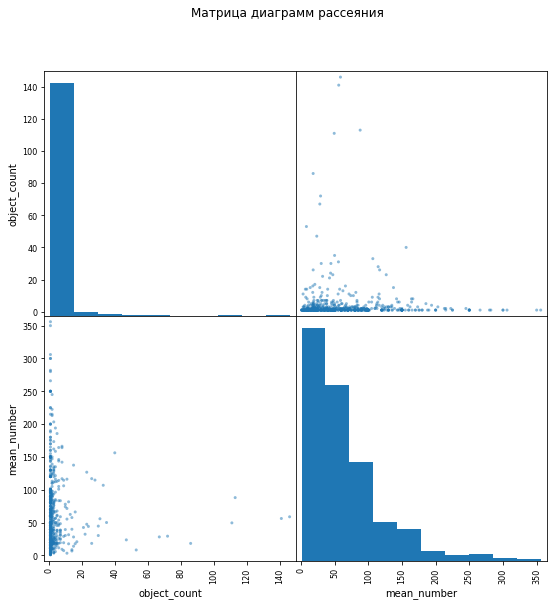

In [40]:
pd.plotting.scatter_matrix(data_grouped, figsize=(9, 9))
plt.suptitle('Матрица диаграмм рассеяния')
plt.show()

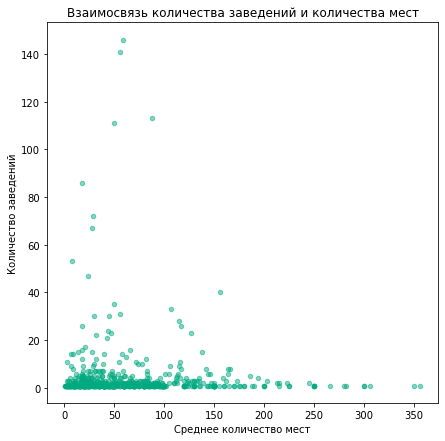

In [41]:
data_grouped.plot.scatter(y = 'object_count', x = 'mean_number', c='#00aa80', alpha=0.5, figsize=(7,7)).set(xlabel='Среднее количество мест', 
ylabel='Количество заведений', 
title = 'Взаимосвязь количества заведений и количества мест')
plt.show()

В проекте мы уже квалифицировали заведения на  - до 50 мест, от 50 до 500 и более 500. 

У большинства сетевых - мало заведений (меньше 50) и мало мест(меньше 50).

Самое большое количество мест- у сетевых с самым низким количеством заведений(1). Максимум - 356
Самое большое количество заведений у KFC - 146, со средним количеством мест - 58.7

 ##### * Среднее количество посадочных мест по типам заведения <a id = "analyz5"></a>

In [42]:
data.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()

,object_type,number
0,столовая,131.210280
1,ресторан,98.779464
2,буфет,57.854932
3,бар,44.964976
4,кафе,41.842805
5,предприятие быстрого обслуживания,32.421657
6,закусочная,16.017544
7,кафетерий,12.740351
8,магазин (отдел кулинарии),11.921875


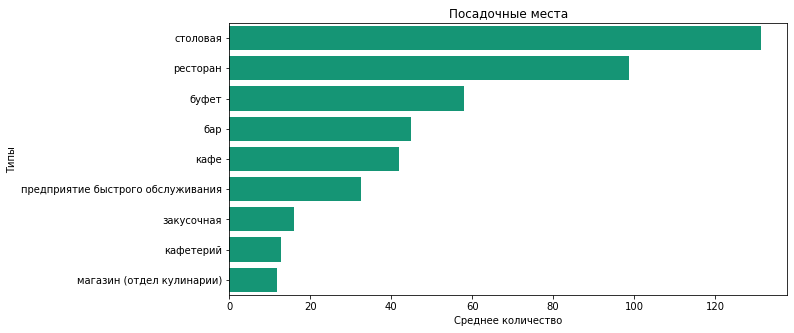

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'number',y='object_type', data=data.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index(), color = "#00aa80").set(xlabel='Среднее количество', ylabel='Типы', 
title = 'Посадочные места')
plt.show()

Больше всего посадочных мест в столовой, рна втором месте -ресторан, на третьем - буфет, но из-за выбросов в данных, смотреть среднее по всей выборке- не правильно, лучше смотреть среднее в разбивке по категориям.

In [44]:
little_cafe.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()

,object_type,number
0,ресторан,34.046434
1,столовая,32.349727
2,бар,26.244444
3,кафе,25.162691
4,буфет,23.561688
5,предприятие быстрого обслуживания,15.920207
6,закусочная,13.060976
7,магазин (отдел кулинарии),11.622047
8,кафетерий,11.157706


В заведениях до 50 мест в топе - ресторан - 34, столовая-32 и бар-26.

In [45]:
std_cafe.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()

,object_type,number
0,столовая,155.199602
1,ресторан,114.906559
2,буфет,108.392344
3,предприятие быстрого обслуживания,93.197628
4,кафетерий,86.333333
5,кафе,85.346491
6,закусочная,85.285714
7,бар,83.380165
8,магазин (отдел кулинарии),50.000000


В заведениях от 50 до 500: в столовой среднее- 155, ресторан - 115, буфет-108.

In [46]:
big_cafe.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()

,object_type,number
0,бар,1700.00000
1,столовая,739.20000
2,ресторан,716.52381
3,предприятие быстрого обслуживания,580.00000
4,кафе,533.00000


В крупных ресторанах в топе бар (скорее всего некорректное заполнение), столовая - 739, ресторан- 716, кафе - 533.

##### * Топ-10 улиц по количеству объектов общественного питания  <a id = "analyz6"></a>

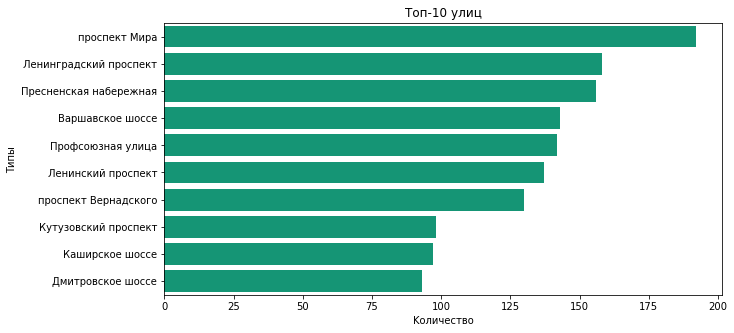

In [47]:
top_10 = data.groupby('street').count().sort_values(by ='id', ascending = False).reset_index().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'id',y='street', data = top_10, color = "#00aa80").set(xlabel=
'Kоличество', ylabel='Типы', title = 'Топ-10 улиц')
plt.show()

In [48]:
data_sum  = data.groupby('street').count().sort_values(by ='id', ascending = False).reset_index()
data_sum['id'].sum()
y = top_10['id'].sum()/data_sum['id'].sum()
print(f'Доля заведений на топовых улицах:{y:.0%}')

Доля заведений на топовых улицах:10%


In [49]:
from io import BytesIO
spreadsheet_id = '1KJ3cifd1dYVcPxoG4VCaFX8bjuiXH5Z1SoGmOLxu5sA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

df.head()

,id,object_name,object_type,address,number,belongs_to_chain,street,coordinates,district
0,151635,СМЕТАНА,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False,улица Егора Абакумова,37.714474 55.879005,Ярославский район
1,77874,Родник,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина,37.673295 55.738307,Таганский район
2,24309,Кафе «Академия»,кафе,"город Москва, Абельмановская улица, дом 6",95,False,Абельмановская улица,37.669576 55.735571,Таганский район
3,21894,ПИЦЦЕТОРИЯ,кафе,"город Москва, Абрамцевская улица, дом 1",40,True,Абрамцевская улица,37.573007 55.892713,район Лианозово
4,119365,Кафе «Вишневая метель»,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False,Абрамцевская улица,37.572279 55.904074,район Лианозово


Создадим датафрейм, в который сохраним информацию только о заведениях, находящихся на топ-10 улицах

In [50]:
top10_streets = top_10.merge(df, on = 'street', how = 'left')
top10_streets = top10_streets.groupby(['street', 'district']).count().reset_index()
top10_streets = top10_streets[['street','district']]
# сгруппируем по районам-где больше всего топовых улиц
top10_streets.groupby('district').count().reset_index().sort_values(by = 'street', ascending = False).head(10)

,district,street
28,Обручевский район,2
59,район Тропарёво-Никулино,2
50,район Нагатино-Садовники,2
22,Донской район,2
23,Ломоносовский район,2
16,9-й микрорайон,2
53,район Проспект Вернадского,2
20,Гагаринский район,2
1,1-й микрорайон,2
44,район Беговой,1


Топовые улицы не распределены в одном районе, в одном районе-максимум 2 топовые улицы. Улицы очень длинные и большинство из них находится между МКАД и Садовым кольцом.

##### * Улицы с одним объектом общественного питания  <a id = "analyz7"></a>

In [51]:
streets_one = data.groupby('street').count().sort_values(by ='id').reset_index()
streets_one = streets_one.query('id==1')
streets_one.head()

,street,id,object_name,chain,object_type,address,number
0,Пестовский переулок,1,1,1,1,1,1
1,Каргопольская улица,1,1,1,1,1,1
2,Карельский бульвар,1,1,1,1,1,1
3,переулок Красина,1,1,1,1,1,1
4,переулок Васнецова,1,1,1,1,1,1


Посмотрим -  в каких они районах

In [52]:
top_one_streets = streets_one.merge(df, on = 'street', how = 'left')
top_one_streets = top_one_streets.groupby(['street','district']).count().reset_index()
top_one_streets = top_one_streets[['street','district']]
top_one_streets.groupby('district').count().reset_index().sort_values(by = 'street', ascending = False).head(10)

,district,street
82,Таганский район,26
63,Басманный район,20
83,Тверской район,20
134,район Марьина Роща,17
79,Пресненский район,15
68,Даниловский район,13
73,Мещанский район,13
118,район Замоскворечье,12
71,Красносельский район,11
154,район Соколиная Гора,11


Большинство улиц с одним объектом расположены ближе к центру. Это может объясняться тем, что улицы там гораздо короче, меньше возможности снять помещение под кафе.

Посмотрим на районы, в которых находятся улицы из двух составленных списков (топ-10 и улиц с одним заведением соотвтетсвенно): 

In [53]:
top_10_pivot = top10_streets.pivot_table(index=['street', 'district'], 
                        values='district', aggfunc='count')

#сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
top_10_pivot

Empty DataFrame
Columns: []
Index: [(Варшавское шоссе, Донской район), (Варшавское шоссе, Нагорный район), (Варшавское шоссе, жилой комплекс Варшавское шоссе 141), (Варшавское шоссе, район Нагатино-Садовники), (Варшавское шоссе, район Чертаново Северное), (Варшавское шоссе, район Чертаново Центральное), (Варшавское шоссе, район Чертаново Южное), (Варшавское шоссе, район Южное Бутово), (Дмитровское шоссе, 1-й микрорайон), (Дмитровское шоссе, 16-й микрорайон), (Дмитровское шоссе, 17-й микрорайон Дегунина), (Дмитровское шоссе, 5-й микрорайон), (Дмитровское шоссе, 8-й микрорайон), (Дмитровское шоссе, 9-й микрорайон), (Дмитровское шоссе, Бескудниковский район), (Дмитровское шоссе, Дмитровский район), (Дмитровское шоссе, Тимирязевский район), (Дмитровское шоссе, микрорайон 7А), (Дмитровское шоссе, район Восточное Дегунино), (Дмитровское шоссе, район Западное Дегунино), (Дмитровское шоссе, район Лианозово), (Дмитровское шоссе, район Северный), (Каширское шоссе, 4-й квартал Москворечья), (Каширское шоссе, молодёжный жилой комплекс Сабурово), (Каширское шоссе, район Москворечье-Сабурово), (Каширское шоссе, район Нагатино-Садовники), (Каширское шоссе, район Орехово-Борисово Северное), (Каширское шоссе, район Орехово-Борисово Южное), (Кутузовский проспект, район Дорогомилово), (Кутузовский проспект, район Фили-Давыдково), (Ленинградский проспект, Хорошёвский район), (Ленинградский проспект, жилой комплекс ВТБ Арена Парк), (Ленинградский проспект, жилой комплекс Царская Площадь), (Ленинградский проспект, район Аэропорт), (Ленинградский проспект, район Беговой), (Ленинградский проспект, район Сокол), (Ленинский проспект, 16-й квартал), (Ленинский проспект, 37-й квартал), (Ленинский проспект, 9-й микрорайон), (Ленинский проспект, Гагаринский район), (Ленинский проспект, Донской район), (Ленинский проспект, Ломоносовский район), (Ленинский проспект, Обручевский район), (Ленинский проспект, жилой комплекс Велл Хаус), (Ленинский проспект, район Проспект Вернадского), (Ленинский проспект, район Тропарёво-Никулино), (Ленинский проспект, район Якиманка), (Пресненская набережная, Московский международный деловой центр Москва-Сити), (Профсоюзная улица, 1-4-й микрорайон), (Профсоюзная улица, 1-й микрорайон), (Профсоюзная улица, 2-й микрорайон), (Профсоюзная улица, 3-4-й микрорайон района Коньково), (Профсоюзная улица, 4-5-й микрорайон), (Профсоюзная улица, 41-й квартал района Коньково), (Профсоюзная улица, 44-47-й квартал района Коньково), (Профсоюзная улица, 48-50-й квартал), (Профсоюзная улица, 7-9-й микрорайон), (Профсоюзная улица, Академический район), (Профсоюзная улица, Новые Черёмушки квартал 22-23), (Профсоюзная улица, Обручевский район), (Профсоюзная улица, район Черёмушки), (Профсоюзная улица, район Ясенево), (проспект Вернадского, Гагаринский район), (проспект Вернадского, Ломоносовский район), (проспект Вернадского, жилой комплекс Миракс Парк), (проспект Вернадского, микрорайон Ленинские Горы), (проспект Вернадского, район Проспект Вернадского), (проспект Вернадского, район Раменки), (проспект Вернадского, район Тропарёво-Никулино), (проспект Мира, Алексеевский район), (проспект Мира, Мещанский район), (проспект Мира, Останкинский район), (проспект Мира, Ярославский район), (проспект Мира, жилой комплекс Триколор), (проспект Мира, жилой комплекс Хилл8), (проспект Мира, район Ростокино), (проспект Мира, район Свиблово)]

In [54]:
top10_streets.groupby('street').count().sort_values(by = 'district', ascending = False)

,district
street,
Дмитровское шоссе,14
Профсоюзная улица,14
Ленинский проспект,11
Варшавское шоссе,8
проспект Мира,8
проспект Вернадского,7
Каширское шоссе,6
Ленинградский проспект,6
Кутузовский проспект,2


Теперь посмотрим на улицы с одним заведением:

In [55]:

top_one_pivot = top_one_streets.pivot_table(index=['street', 'district'], 
                        values='district', aggfunc='count')
top_one_pivot

,
street,district
1-й Балтийский переулок,район Аэропорт
1-й Басманный переулок,Красносельский район
1-й Ботанический проезд,район Свиблово
1-й Вешняковский проезд,14-й квартал Чухлинки
1-й Голутвинский переулок,район Якиманка
1-й Зачатьевский переулок,139-й квартал
1-й Кирпичный переулок,район Соколиная Гора
1-й Кожевнический переулок,Даниловский район
1-й Кожуховский проезд,Даниловский район


In [56]:
top_one_streets.groupby('street').count().sort_values(by = 'district', ascending = False)

,district
street,
Мартеновская улица,2
Холмогорская улица,2
улица Коновалова,2
улица Липчанского,2
Селигерская улица,2
Средний Овчинниковский переулок,1
Средний Кондратьевский переулок,1
Средняя Калитниковская улица,1
Спортивный проезд,1


In [57]:
len(top_one_streets)

534

In [58]:
ay = streets_one['id'].sum()/data_sum['id'].sum()
print(f'Доля объектов на улицых с одним объектом общественного питания:{ay:.0%}')

Доля объектов на улицых с одним объектом общественного питания:4%


##### * Вывод  <a id = "analyz8"></a>
Всего:15366 заведений 
Топ самых распространенных заведений: 
кафе (42%)
столовая (18,7%)
ресторан (16%)
заведения до 50 мест - 50%
заведения от 50 до 500 мест - 38%

Стоит рассмотреть возможность открыть:
* кафе 
* до 50 мест 
* что касается района, то: в топ-10 улицы чаще длинные (находятся в нескольких районах), а улицы из списка с одним заведением короткие(находятся максимум в двух районах) - возможно,  улицы из топ-10 на самом деле не популярнее улиц с заведениями-одиночками, а просто длиннее, и за счет этого суммарное количество заведений набирается бОльшим, хотя если рассматривать плотность заведений на этих улицах, она может оказаться небольшой. Для выбора района лучше провести дополнительно более глубокое исследование (например, с анализом местоположения по районам, учитывая координаты, с учетом плотности расположения заведений на карте, близости от метро и т.д.).

На рынке значительно преобладают несетевые точки питания, потому лучше начать с открытия одного не сетевого заведения. На нем можно будет “обкатать” бизнес и затем уже рассмотреть возможность превращения бизнеса в сеть.





#### 4. Презентация : <a id = "preza"></a>  https://drive.google.com/file/d/1fyfckS_S2sEvRXYF96Xa-XifIPNzwYXj/view?usp=sharing
